In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [17]:
hung_comparison = pd.read_csv("hung_comparison.csv")
hung_comparison['Common Char %'] = hung_comparison['Common Char']/hung_comparison['Length']
h_a = pd.read_csv("h_a.csv")
h_b = pd.read_csv("h_b.csv")
h_r = pd.read_csv("h_r.csv")
result = pd.read_csv("result.csv")
result['Vowel Percent'] = result['Vowel Ct']/result['Word Len']
result['Cons Percent'] = result['Cons Ct']/result['Word Len']
result['Cons/Vowel'] = result['Cons Ct']/result['Vowel Ct']

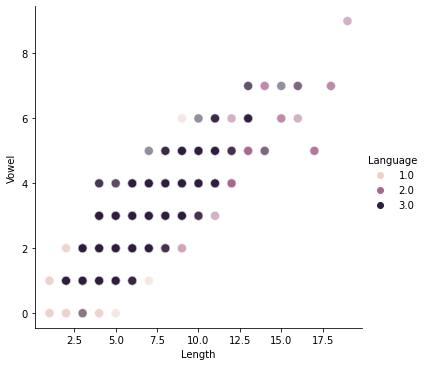

In [18]:
sns.relplot(x="Length", y="Vowel", hue="Language", s=80, alpha=0.5, data= hung_comparison)


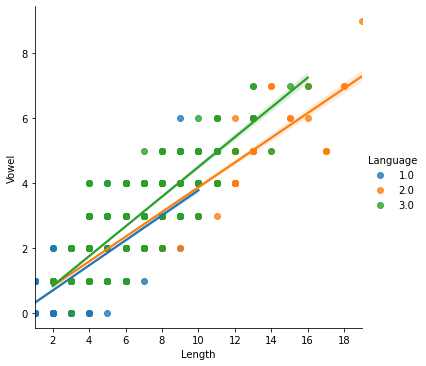

In [19]:
sns.lmplot(x="Length", y="Vowel", hue="Language", data=hung_comparison)


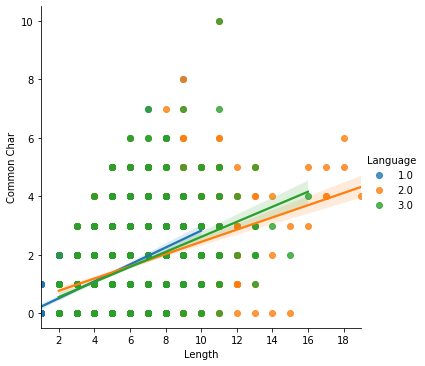

In [20]:
sns.lmplot(x="Length", y="Common Char", hue="Language", data=hung_comparison)


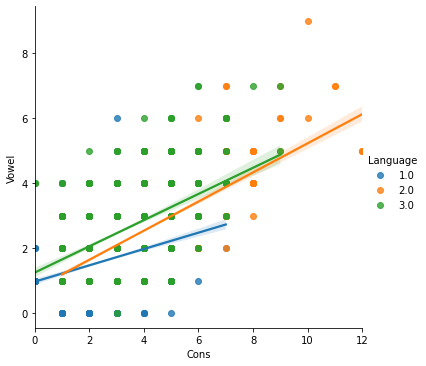

In [21]:
sns.lmplot(x="Cons", y="Vowel", hue="Language", data=hung_comparison)


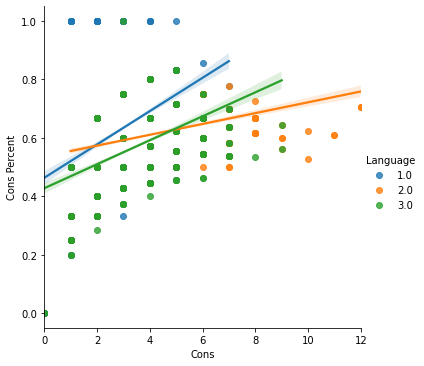

In [22]:
sns.lmplot(x="Cons", y="Cons Percent", hue="Language", data=hung_comparison)


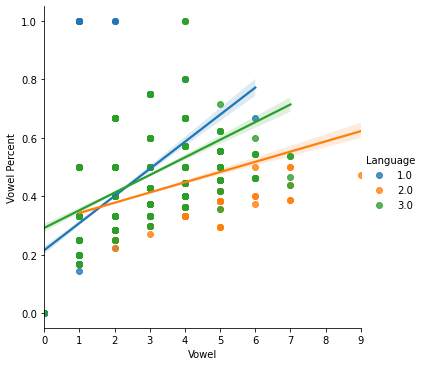

In [23]:
sns.lmplot(x="Vowel", y="Vowel Percent", hue="Language", data=hung_comparison)


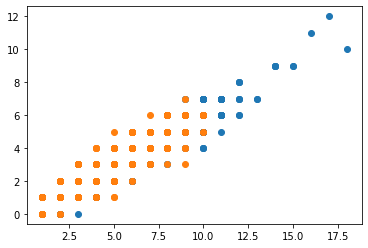

In [24]:
plt.scatter(h_a['H Word Length'], h_a['H Consonant Count'])
plt.scatter(h_a['A Word Length'], h_a['A Consonant Count'])

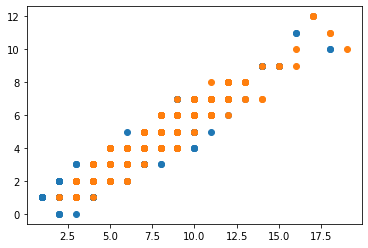

In [25]:
plt.scatter(h_b['H Word Length'], h_b['H Consonant Count'])
plt.scatter(h_b['B Word Length'], h_b['B Consonant Count'])

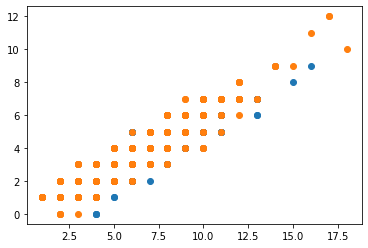

In [26]:
plt.scatter(h_r['R Word Length'], h_r['R Consonant Count'])
plt.scatter(h_r['H Word Length'], h_r['H Consonant Count'])

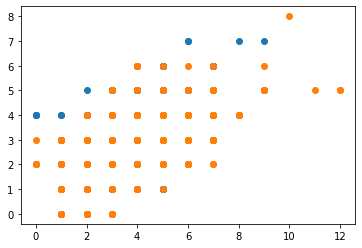

In [27]:
plt.scatter(h_r['R Consonant Count'], h_r['R Vowel Count'])
plt.scatter(h_r['H Consonant Count'], h_r['H Vowel Count'])

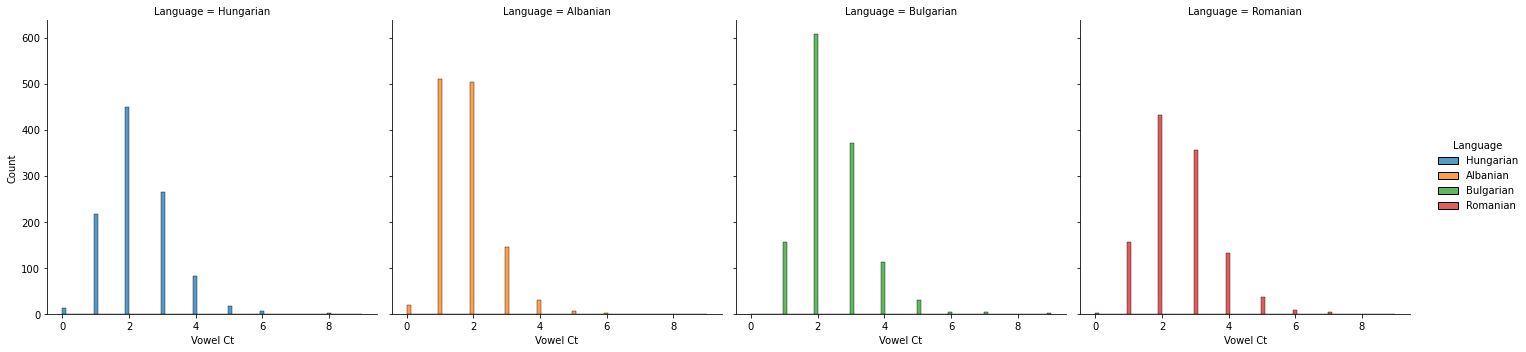

In [28]:
sns.displot(data=result, x="Vowel Ct", hue="Language", col="Language")

In [29]:
hva = result[(result.Language == "Albanian") | (result.Language == "Hungarian")]
hvr = result[(result.Language == "Romanian") | (result.Language == "Hungarian")]
hvb = result[(result.Language == "Bulgarian") | (result.Language == "Hungarian")]

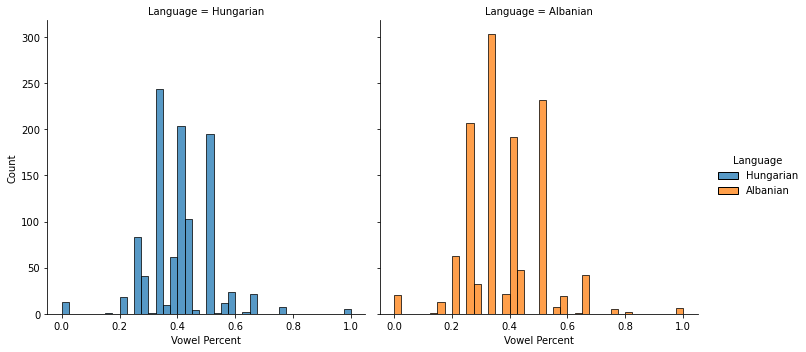

In [30]:
sns.displot(data=hva, x="Vowel Percent", hue="Language", col="Language")

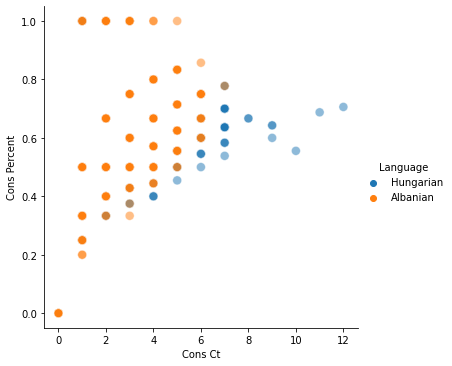

In [31]:
sns.relplot(x="Cons Ct", y="Cons Percent", hue="Language", s=80, alpha=0.5, data= hva)

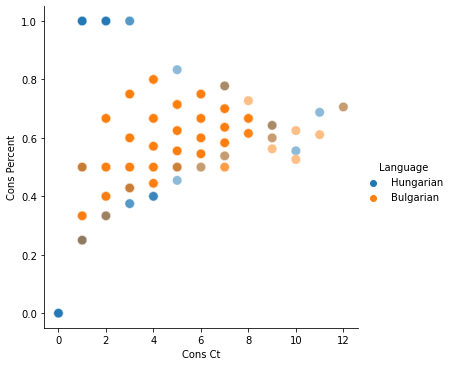

In [32]:
sns.relplot(x="Cons Ct", y="Cons Percent", hue="Language", s=90, alpha=0.5, data= hvb)

(array([459., 681., 441., 136.,   0.,  42.,  12.,   2.,   1.,   1.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

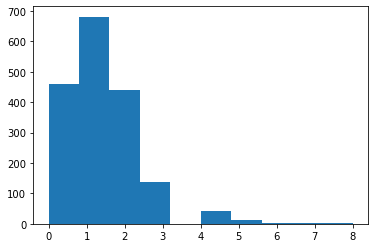

In [33]:
from collections import Counter   
h_a['Common Char'] = 0
com_char = []
for i in range(len(h_a["Hungarian"])):
    common_letters = Counter(h_a.Hungarian.iloc[i]) & Counter(h_a.Albanian.iloc[i])
    com_char.append(sum(common_letters.values()))
h_a['Common Char'] = com_char
plt.hist(h_a["Common Char"])

(array([351., 605., 492., 252., 111.,  43.,   7.,   2.,   1.,   1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

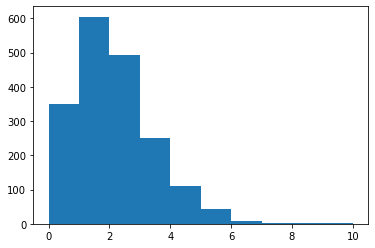

In [35]:
com_char2 = []
for i in range(len(h_b["Hungarian"])):
    common_letters = Counter(h_b.Hungarian.iloc[i]) & Counter(h_b.Bulgarian.iloc[i])
    com_char2.append(sum(common_letters.values()))
h_b['Common Char'] = com_char2
plt.hist(h_b["Common Char"])

(array([328., 577., 405., 180.,  62.,  24.,   7.,   3.,   0.,   1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

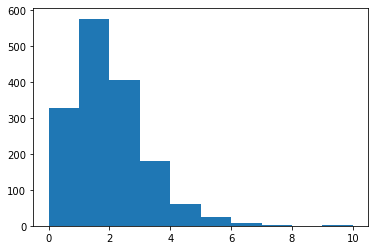

In [36]:
com_char3 = []
for i in range(len(h_r["Hungarian"])):
    common_letters = Counter(h_r.Hungarian.iloc[i]) & Counter(h_r.Romanian.iloc[i])
    com_char3.append(sum(common_letters.values()))   
h_r['Common Char'] = com_char3
plt.hist(h_r["Common Char"])

In [41]:
print(
h_a['Common Char'].std(),
h_b['Common Char'].std(),
h_r['Common Char'].std(),
h_a['Common Char'].mean(),
h_b['Common Char'].mean(),
h_a['A Word Length'].mean(),
h_b['B Word Length'].mean(),
h_r['R Word Length'].mean())

1.070883452238061 1.2950181446007554 1.2236250342052282 1.2540845070422535 1.650402144772118 4.569014084507042 6.221983914209115 5.652804032766226


In [43]:
print('h_a Std: {}, h_b Std: {}, Std Common Char between Hung. and Rom {}, {}, {}, {}, {}, {}'.format(h_a['Common Char'].std(),
h_b['Common Char'].std(),
h_r['Common Char'].std(),
h_a['Common Char'].mean(),
h_b['Common Char'].mean(),
h_a['A Word Length'].mean(),
h_b['B Word Length'].mean(),
h_r['R Word Length'].mean()))

h_a Std: 1.070883452238061, h_b Std: 1.2950181446007554, Std Common Char between Hung. and Rom 1.2236250342052282, 1.2540845070422535, 1.650402144772118, 4.569014084507042, 6.221983914209115, 5.652804032766226
